masked_img :  (616, 766)


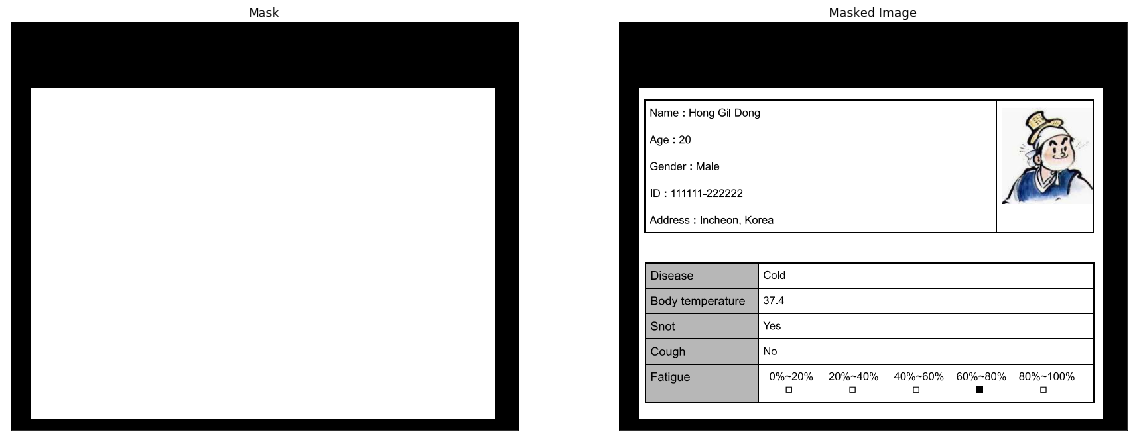

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sample.png')

mask = np.zeros(img.shape[:2],np.uint8)
mask[100:600,30:730] = 255

masked_img = cv2.bitwise_and(img,img,mask=mask)

img = img[:,:,::-1]
masked_img = masked_img[:,:,::-1]

print("masked_img : ", masked_img.shape[:2])

plt.figure(figsize=(20, 10)) 

plt.subplot(121),plt.imshow(mask,'gray'),plt.title('Mask'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(masked_img,'gray'),plt.title('Masked Image'), plt.xticks([]), plt.yticks([])

plt.show()

In [9]:
img2 = cv2.imread('gnd.png')

rows, cols = masked_img.shape[:2]
roi = img2[0:rows, 0:cols]

img2gray = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 125, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)

masked_img2 = cv2.bitwise_and(roi, roi, mask=mask_inv)

dst = cv2.add(masked_img, masked_img2)
img2[0:rows, 0:cols] = dst

cv2.imshow('res', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()